In [2]:
import numpy as np

In [1]:
d = {}

In [3]:
keys = ['fast_mode', 'alfven_mode', 'acoustic_mode']

In [9]:
d = dict.fromkeys(keys)

In [10]:
d

{'fast_mode': None, 'alfven_mode': None, 'acoustic_mode': None}

In [14]:
for key in d.keys():
    d[key] = np.full((5), np.nan)

In [15]:
d['fast_mode']

array([nan, nan, nan, nan, nan])

In [11]:
d.keys()

dict_keys(['fast_mode', 'alfven_mode', 'acoustic_mode'])

In [4]:
a = np.arange(10)

In [5]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
hasattr(a, 'len')

False

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def two_fluid_dispersion_solution(n, B, T_i, theta, k, m_e=None, m_i=None, T_e=None, gamma_e=3., gamma_i=3):

    r"""
    Equation 34 of Bellan2012 (doi:10.1029/2012JA017856)

    .. math::
    \zeta^3 - A\zeta^2 + B\zeta - C = 0

    """

    if ((n is None) or (n <= 0)):
        raise ValueError("Number density must be a positive real number")

    #if ((T_e is None) or (T_e <= 0)):
    #    raise ValueError("Electron temperature must be a positive real number")

    if ((T_i is None) or (T_i <= 0)):
        raise ValueError("Ion temperature must be a positive real number")

    if (theta is None):
        raise ValueError("Propagation direction can't be None")

    if (T_e is None):
        T_e = T_i

    #if ((k is None) or (k <= 0)):
    #    raise ValueError("Wave number must be a positive real number")

    # The required physcial constants
    gamma_sigma = 1
    m_i  = 1.672622E-24
    m_e  = 9.109384E-28
    mu_0 = 1
    e    = 4.8032E-10
    c    = 2.99792458E10
    k_B  = 1.3807E-16

    # Required derived parameters
    c_s = np.sqrt(gamma_sigma * k_B * (T_i + T_e) / m_i)
    v_A = np.sqrt(B**2/(mu_0 * n * m_i))
    omega_ci = e * B/(c * m_i)
    omega_pe = np.sqrt((mu_0 * n * e**2)/m_e)

    alpha = np.cos(theta)**2
    beta = c_s**2/v_A**2
    Lambda = k**2 * v_A**2/omega_ci**2

    Q = 1 + k**2 * c**2/omega_pe**2

    A = (Q + Q**2 * beta + Q * alpha + alpha * Lambda)/Q**2
    B = alpha * (1 + 2 * Q * beta + Lambda * beta)/Q**2
    C = alpha**2 * beta/Q**2

    p = (3 * B - A**2)/3
    q = (9 * A * B - 2 * A**3 - 27 * C)/27


    keys = ['fast_mode', 'alfven_mode', 'acoustic_mode']
    zeta_sol = dict.fromkeys(keys)
    omega    = dict.fromkeys(keys)

    for (j,key) in zip(range(3), keys):

        # The solution corresponding to equation 37
        zeta_sol[key] = 2 * np.sqrt(-p/3) * np.cos(1/3 * np.arccos(3 * q/(2 * p)
        * np.sqrt(-3/p)) - 2 * np.pi/3 * j) + A/3

        # The solution corresponding to equation 38
        omega[key] = omega_ci * np.sqrt(2 * Lambda * np.sqrt(-p/3)
        * np.cos(1/3 * np.arccos(3 * q/(2 * p) * np.sqrt(-3/p)) - 2 * np.pi/3 * j) + Lambda * A/3)

    #omega = np.sqrt(k**2 * v_A**2 * zeta_sol)

    return omega, v_A, beta, c_s, omega_ci

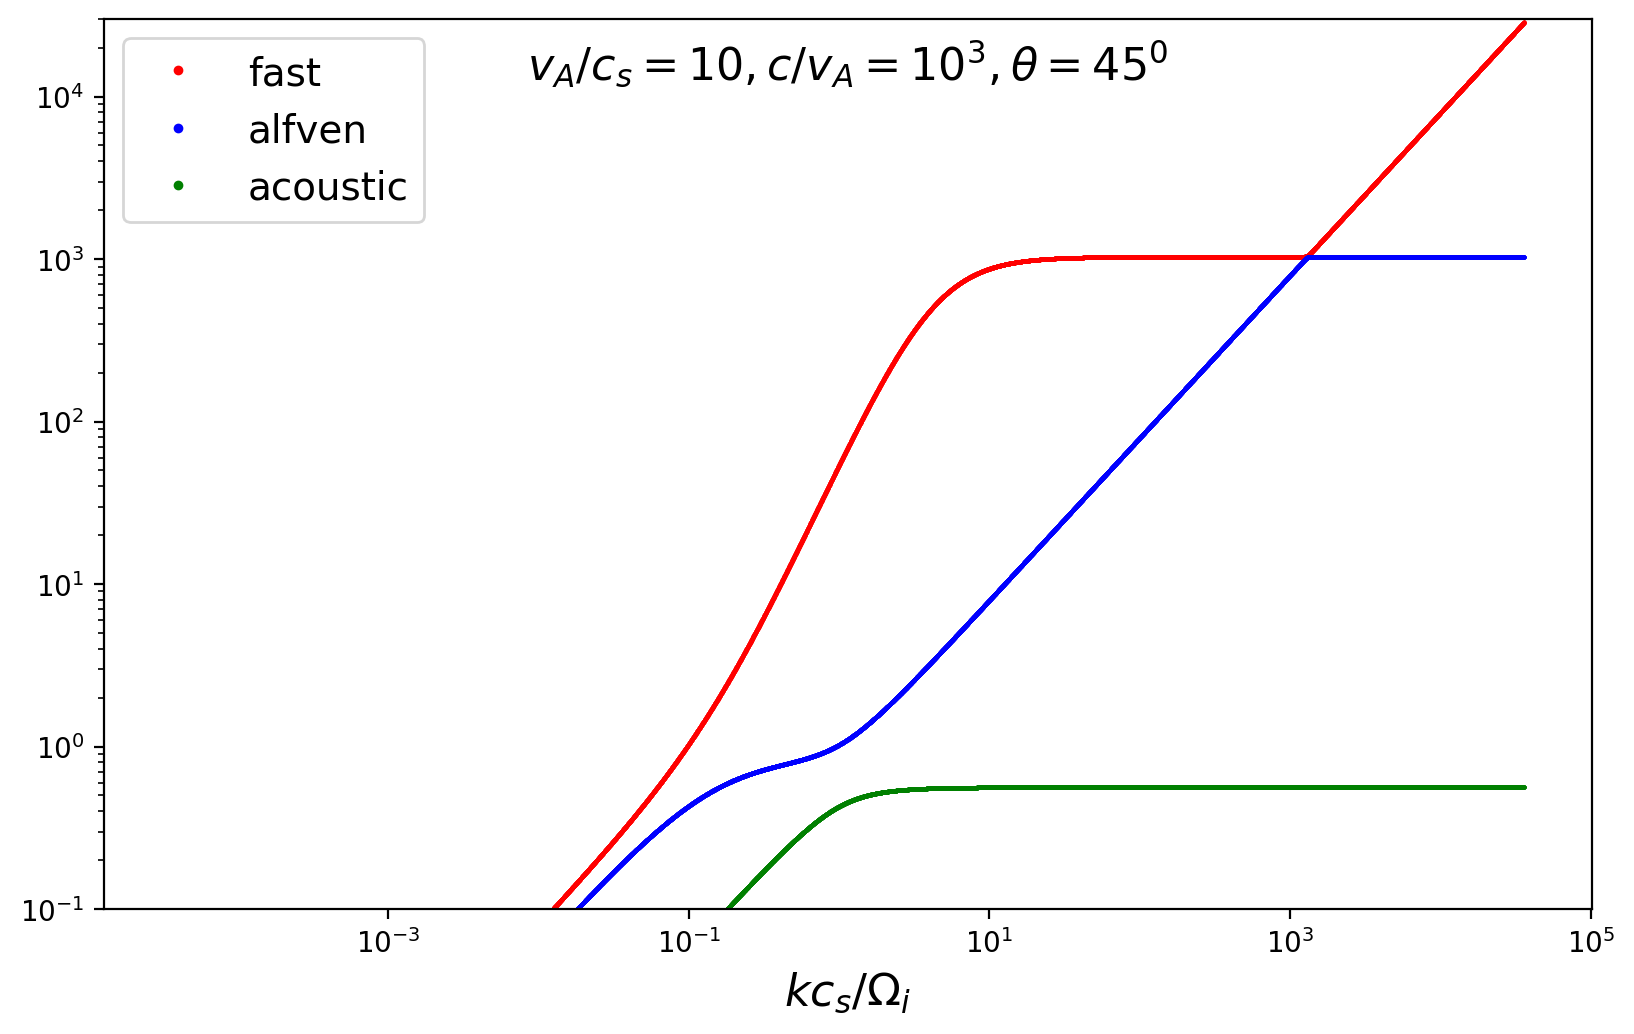

In [104]:
k = np.logspace(-11, -2, 1E4)
c = 3E10 # Speed of light in cm/sec
theta = np.pi/4
omega, v_A, beta, c_s, omega_ci = two_fluid_dispersion_solution(n=5, B=8.3e-5, T_i=5.e4, theta=theta, k=k)

omega_fast     = omega['fast_mode']
omega_alfven   = omega['alfven_mode']
omega_acoustic = omega['acoustic_mode']

k_prime = k * c_s/omega_ci

fig = plt.figure( num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='gray' )
fig.subplots_adjust( left=0.05, right=0.98, top=0.94, bottom=0.05, 
wspace=0., hspace=0. )

axs = fig.add_subplot( 1, 1, 1 )
axs.plot(k_prime, omega_fast, 'r.', ms=1, label='fast')
axs.plot(k_prime, omega_alfven, 'b.', ms=1, label='alfven')
axs.plot(k_prime, omega_acoustic, 'g.', ms=1, label='acoustic')
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(1.e-1, 3.e4)
text = f'$v_A/c_s = {v_A/c_s:.0f}, c/v_A = 10^{np.log10(c/v_A):.0f}, \\theta = {theta*180/np.pi:.0f}^0$'
axs.text(0.5,0.95, text, horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, fontsize=16)
axs.set_xlabel(r'$kc_s/\Omega_i$', fontsize=16)
axs.legend(loc='best', markerscale=5, fontsize=14)
plt.show()

#print('omega_fast=%s,%s' %(np.nanmin(omega_fast), np.nanmax(omega_fast)))
#print('omega_alfven=%s,%s' %(np.nanmin(omega_alfven), np.nanmax(omega_alfven)))
#print('omega_acoustic=%s,%s' %(np.nanmin(omega_acoustic), np.nanmax(omega_acoustic)))


In [110]:
c_s/1.e5

28.7310011844849

In [26]:
print(f'$v_A/c_s = {v_A/c_s:.0f}, c/v_A = 10^{np.log10(c/v_A):2.0f}, \\theta = {theta*180/np.pi:.0f}$')

$v_A/c_s = 10, c/v_A = 10^ 3, \theta = 45$


In [32]:
from astropy import units as u

In [78]:
v = 1.e4 * u.m

In [71]:
v.to(u.K, equivalencies=u.temperature_energy())

<Quantity 1.16045221e+08 K>

In [74]:
v.to(u.K, equivalencies=u.temperature_energy())

<Quantity 1.16045221e+08 K>

In [79]:
v.unit == 'm'

True

In [80]:
import plasmapy.formulary.parameters as pfp

In [92]:
pfp.Alfven_speed( B, n, ion).to(u.km/u.s)

<Quantity 146.27974879 km / s>

In [135]:
B = 8 * u.nT
n = 5 * u.cm ** -3
z = 1
T_i = 1.e4 * u.K
gamma_e = 1
gamma_i = 3
ion='p'
pfp.ion_sound_speed(T_e=40*T_i, T_i=T_i, ion='p').to(u.km/u.s)

<Quantity 59.57676322 km / s>

In [117]:
from astropy.constants.si import c, e, k_B, m_e, m_p, mu0

import plasmapy.formulary.parameters as pfp

from plasmapy.utils.decorators import validate_quantities

In [216]:
@validate_quantities(
    n={"can_be_negative": False},
    B={"can_be_negative": False},
    T_i={"can_be_negative": False, "equivalencies": u.temperature_energy()},
    T_e={"can_be_negative": False, "equivalencies": u.temperature_energy()},
    theta={"can_be_negative":True},
    m_i={"can_be_negative":False},
    m_e={"can_be_negative":False}
)
def two_fluid_dispersion_solution(n: u.m ** -3, B: u.T, T_i: u.K, T_e: u.K,  k: u.m ** -1, theta: u.deg = 45 * u.deg, z=1, gamma_e=1, gamma_i=3) :

    # Required derived parameters
    c_s = pfp.ion_sound_speed(T_e=T_e, T_i=T_i, n_e=z * n, gamma_e =
    gamma_e, gamma_i = gamma_i, ion='p+')
    v_A = pfp.Alfven_speed( B, n, ion)
    omega_ci = pfp.gyrofrequency(B=B, particle='p+', signed=False, Z=z)
    omega_pe = pfp.plasma_frequency(n=n, particle='e-', z_mean=z)

    alpha = (np.cos(theta)**2).value
    beta = (c_s**2/v_A**2).value
    Lambda = (k**2 * v_A**2/omega_ci**2).value

    Q = 1 + (k**2 * c**2/omega_pe**2).value

    A = (Q + Q**2 * beta + Q * alpha + alpha * Lambda)/Q**2
    B = alpha * (1 + 2 * Q * beta + Lambda * beta)/Q**2
    C = alpha**2 * beta/Q**2

    p = (3 * B - A**2)/3
    q = (9 * A * B - 2 * A**3 - 27 * C)/27


    keys = ['fast_mode', 'alfven_mode', 'acoustic_mode']
    omega    = dict.fromkeys(keys)

    for (j,key) in zip(range(3), keys):

        # The solution corresponding to equation 38
        omega[key] = omega_ci * np.sqrt(2 * Lambda * np.sqrt(-p/3)
        * np.cos(1/3 * np.arccos(3 * q/(2 * p) * np.sqrt(-3/p)) - 2 * np.pi/3
        * j) + Lambda * A/3)

    return omega

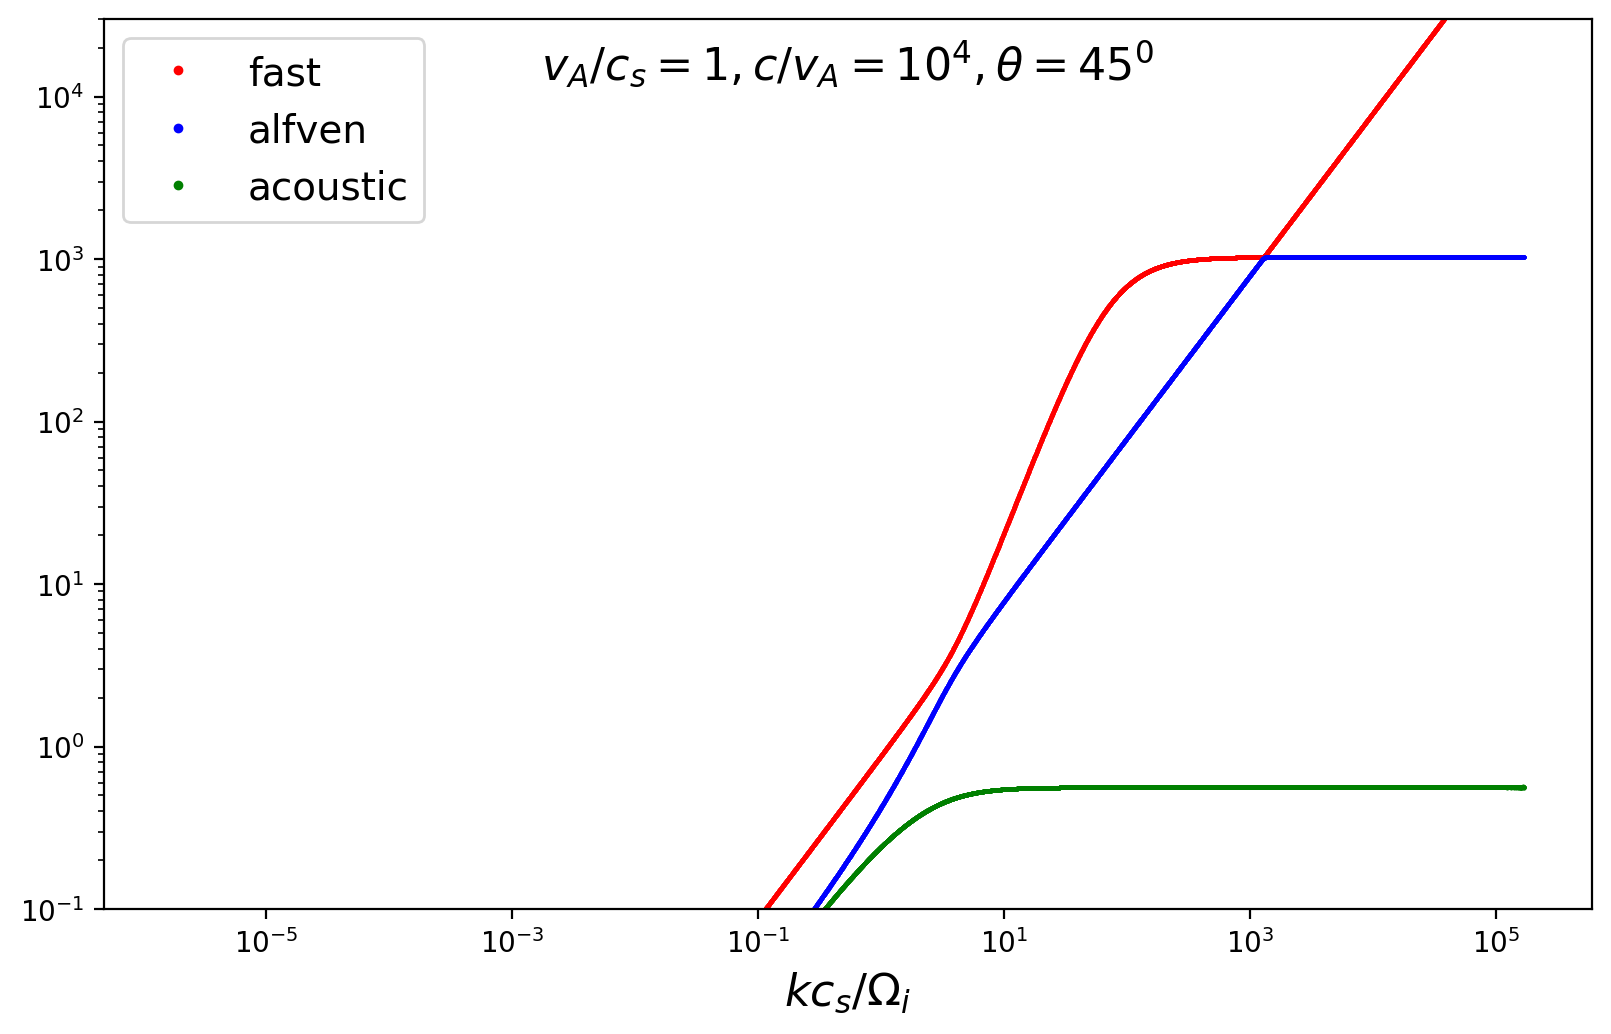

In [217]:
k = np.logspace(-11, 0, 1E4) * u.m ** -1
theta = np.pi/4 * u.rad
n = 5 * u.cm ** -3
B = 8.3E-9 * u.T
T_e = 1.e6 * u.K
T_i = 4.e5 * u.K
z = 1
c = 3.e8 * u.m/u.s
c_s = pfp.ion_sound_speed(T_e=T_e, T_i=T_i, n_e=z * n)
v_A = pfp.Alfven_speed( B, n, ion)
omega_ci = pfp.gyrofrequency(B=B, particle='p+', signed=False, Z=z)

omega = two_fluid_dispersion_solution(n=n, B=B, T_e=T_e, T_i=T_i, theta=theta, z=z, k=k)

omega_fast     = omega['fast_mode']
omega_alfven   = omega['alfven_mode']
omega_acoustic = omega['acoustic_mode']

k_prime = k * c_s/omega_ci

fig = plt.figure( num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='gray' )
fig.subplots_adjust( left=0.05, right=0.98, top=0.94, bottom=0.05, 
wspace=0., hspace=0. )

axs = fig.add_subplot( 1, 1, 1 )
axs.plot(k_prime, omega_fast, 'r.', ms=1, label='fast')
axs.plot(k_prime, omega_alfven, 'b.', ms=1, label='alfven')
axs.plot(k_prime, omega_acoustic, 'g.', ms=1, label='acoustic')
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(1.e-1, 3.e4)
text = f'$v_A/c_s = {v_A/c_s:.0f}, c/v_A = 10^{np.log10(c/v_A):.0f}, \\theta = {theta.value*180/np.pi:.0f}^0$'
axs.text(0.5,0.95, text, horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, fontsize=16)
axs.set_xlabel(r'$kc_s/\Omega_i$', fontsize=16)
axs.legend(loc='best', markerscale=5, fontsize=14)
plt.show()

#print('omega_fast=%s,%s' %(np.nanmin(omega_fast), np.nanmax(omega_fast)))
#print('omega_alfven=%s,%s' %(np.nanmin(omega_alfven), np.nanmax(omega_alfven)))
#print('omega_acoustic=%s,%s' %(np.nanmin(omega_acoustic), np.nanmax(omega_acoustic)))


In [218]:
omega['fast_mode'].unit

Unit("rad / s")

In [211]:
v_A/c_s, c/v_A

(<Quantity 0.60064383>, <Quantity 3706.38232003>)